## Loading the data

In [1]:
#%matplotlib qt

import xupy as xp
import utils as ut
import processing as p
import grasp
stats = grasp.stats
from matplotlib.pyplot import *
import astropy.units as u

tn = '20250926_122421'
tn = '20250929_123058'
tn45 = '20250929_160852'
tn90 = '20251001_115908'
tn_500mas = '20251001_154655'
cal_psf = ut.load_psf(f"{ut.simpath}/observations/{tn_500mas}/calibration.fits")
cube = ut.load_psf_cube(tn_500mas)



[XuPy] Multiple GPUs detected:
       - gpu_id 0 : NVIDIA L40S | Memory = 46579.46 MB | Compute Capability = 8.9
       - gpu_id 1 : NVIDIA L40S | Memory = 46579.46 MB | Compute Capability = 8.9
       Using CuPy 13.6.0 for acceleration.
No GRASPDATA environment variable found. Using the HOME folder.


## Image Parameter Determination

### Harmonic decomposition of the reduced Chi-squared:

$$ \ln{\chi^2_{red}(\varphi)} \simeq c_0 + c_2 \cos{2\varphi} + s_2 \sin{2\varphi} \quad ; \quad \text{k=2 term dominant for binaries} $$

 - `ipd_gof_harmonic_amplitude` : $ \sqrt{c_2^2 + s_2^2} $

 - `ipd_gof_harmonic_phase` : $ \mathcal{arctan2}\bigg(\dfrac{s_2}{c_2}\bigg) $

findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


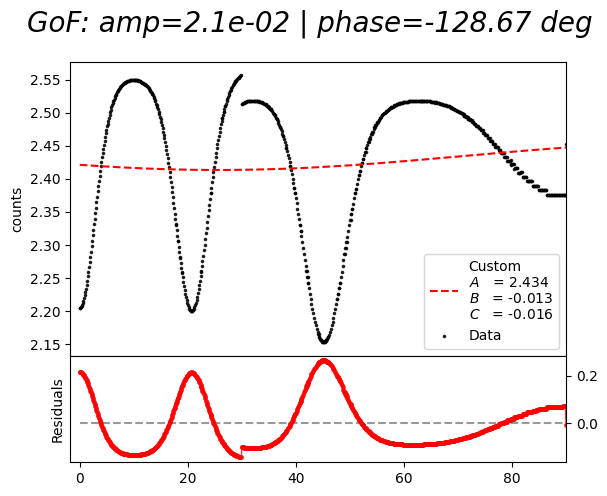

(0.02085644022532987, -128.67462330507456)

In [2]:
p.ipd_gof_harmonic(cube, cal_psf, show=True)

### Multi-Peak detection

Defined as the fraciton of succesful transit with multi-peaks detected on the psf

In [3]:
p.ipd_frac_multipeak(cube, show=True)

0.7535121328224776

In [ ]:
# interactive_psf_plot.py
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np  # Assuming needed for data handling

def create_interactive_psf_plot(cube, processing_module):
    """
    Creates an interactive plot with a slider to navigate PSF data.
    - cube: List or array of PSF data objects (e.g., from ut.load_psf_cube).
    - processing_module: Module containing p.find_local_maxima (e.g., import processing as p).
    
    In astrophysics context: Useful for visualizing PSF local maxima across orbital phases,
    helping identify multi-peak structures indicative of binaries (e.g., via harmonic decomposition).
    """
    # Set interactive backend (adjust as needed)
    #plt.switch_backend('TkAgg')  # Or 'Qt5Agg' if Qt is available
    
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.subplots_adjust(bottom=0.25)  # Space for slider
    
    # Initial plot
    index = 0
    maxima = processing_module.find_local_maxima(cube[index], which='al', show=False)
    line_psf, = ax.plot(cube[index].psf_x, label='PSF')
    scat_maxima = ax.scatter(*zip(*maxima), color='red', label='Maxima')
    ax.legend()
    ax.set_title(r'Local Maxima in PSF | $\varphi$=' + f"{cube[index].phi:.2f}")
    ax.set_xlabel('Pixel')
    ax.set_ylabel('Intensity')
    ax.grid(True)
    
    # Slider axis
    ax_slider = plt.axes([0.2, 0.1, 0.65, 0.03])  # Position: [left, bottom, width, height]
    slider = Slider(ax_slider, 'Data Index', 0, len(cube)-1, valinit=0, valstep=1)
    
    def update(val):
        index = int(slider.val)
        maxima = processing_module.find_local_maxima(cube[index], which='al', show=False)
        line_psf.set_ydata(cube[index].psf_x)  # Update PSF line (assuming psf_x is the data)
        scat_maxima.set_offsets(maxima)  # Update scatter points
        ax.set_title(r'Local Maxima in PSF | $\varphi$=' + f"{cube[index].phi:.2f}")
        fig.canvas.draw_idle()
    
    slider.on_changed(update)
    plt.show()

# Example usage in a script:
# import interactive_psf_plot
# import utils as ut
# import processing as p
# cube = ut.load_psf_cube('your_tn')
# interactive_psf_plot.create_interactive_psf_plot(cube, p)

In [20]:
create_interactive_psf_plot(cube, p)

ImportError: Cannot load backend 'TkAgg' which requires the 'tk' interactive framework, as 'headless' is currently running

In [ ]:
from ipywidgets import interact, widgets

def interactive_plot(index):
    clf()  # Clear the current figure
    # Call your modified plotting function (without show=True)
    maxima = p.find_local_maxima(cube[index], which='al', show=False)
    # If needed, add plt.title(f"Data {index}") or other customizations
    plot(cube[index].psf_x, label='PSF')
    scatter(*zip(*maxima), color='red', label='Maxima')
    legend()
    title(r'Local Maxima in PSF | $\varphi$='+f"{cube[index].phi:.2f}")
    xlabel('Pixel')
    ylabel('Intensity')
    grid()
    draw()  # Update the display

interact(interactive_plot, index=widgets.IntSlider(min=0, max=len(cube)-1, step=1, value=0, description='Data Index:'))

interactive(children=(IntSlider(value=0, description='Data Index:', max=782), Output()), _dom_classes=('widget…

<function __main__.interactive_plot(index)>

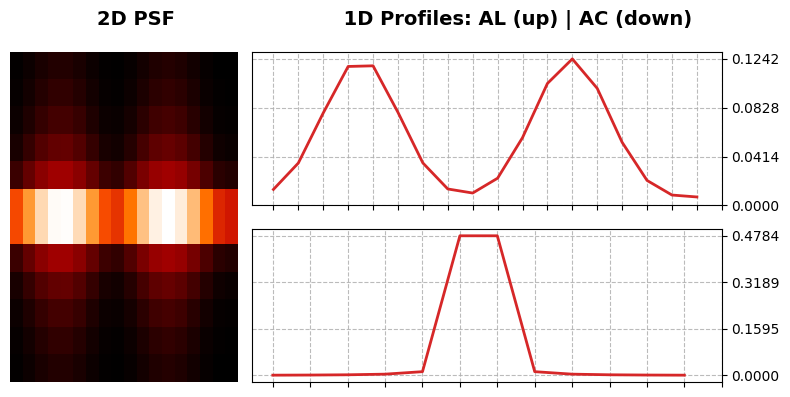

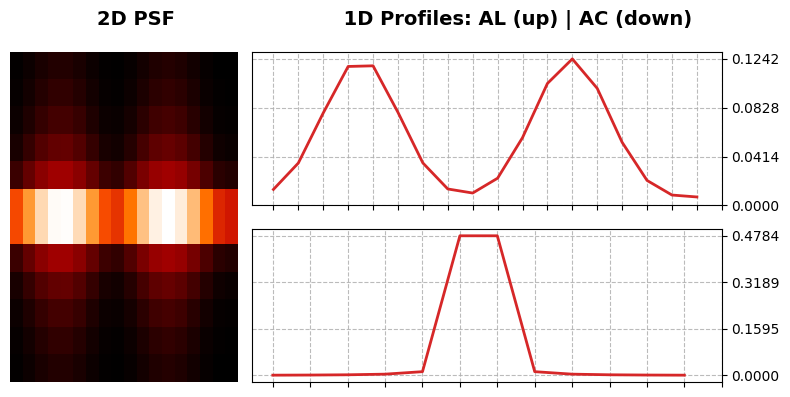

In [23]:
ut.display_psf(cube[0].psf_2d, mode='all')

In [13]:
12//4

3